<a href="https://colab.research.google.com/github/zedeme/Keras-MultipleClassifier/blob/main/Keras_ClasificadorMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from tensorflow.keras import regularizers

In [190]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [191]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get( _ - 3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [192]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults     

In [193]:
x = vectorizar(train_data)
x_test = vectorizar(test_data)

In [194]:
y = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [195]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation="softmax"))

In [196]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [197]:
history = model.fit(x,y,epochs=9,batch_size=512,validation_split=0.3)

Epoch 1/9
13/13 [==============================] - 1s 66ms/step - loss: 3.2590 - accuracy: 0.3211 - val_loss: 2.2914 - val_accuracy: 0.5529
Epoch 2/9
13/13 [==============================] - 1s 49ms/step - loss: 2.3115 - accuracy: 0.5028 - val_loss: 1.8172 - val_accuracy: 0.6249
Epoch 3/9
13/13 [==============================] - 1s 49ms/step - loss: 1.9490 - accuracy: 0.5725 - val_loss: 1.5919 - val_accuracy: 0.6727
Epoch 4/9
13/13 [==============================] - 1s 48ms/step - loss: 1.7400 - accuracy: 0.6246 - val_loss: 1.4887 - val_accuracy: 0.6935
Epoch 5/9
13/13 [==============================] - 1s 47ms/step - loss: 1.6108 - accuracy: 0.6504 - val_loss: 1.4152 - val_accuracy: 0.7102
Epoch 6/9
13/13 [==============================] - 1s 48ms/step - loss: 1.4974 - accuracy: 0.6803 - val_loss: 1.3594 - val_accuracy: 0.7184
Epoch 7/9
13/13 [==============================] - 1s 47ms/step - loss: 1.4318 - accuracy: 0.6929 - val_loss: 1.3275 - val_accuracy: 0.7299
Epoch 8/9
13/13 [===

In [198]:
sns.set(rc={"figure.figsize": (15,9)})

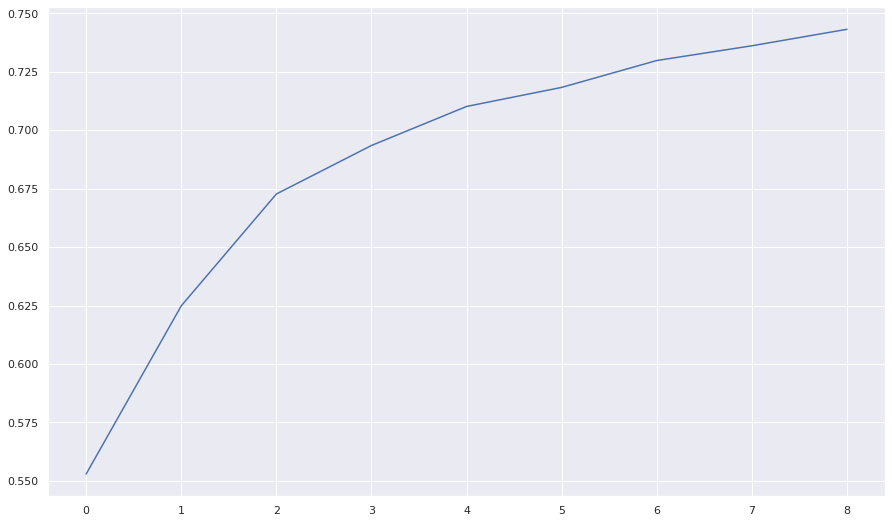

In [199]:
sns.lineplot(x=range(0,9), y=history.history["val_accuracy"])

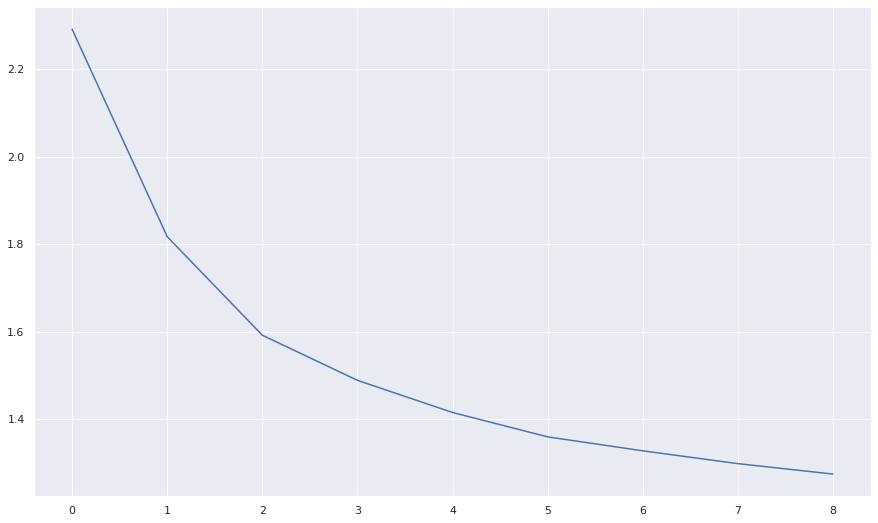

In [200]:
sns.lineplot(x=range(0,9), y=history.history["val_loss"])

In [201]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.3510 - accuracy: 0.7235


[1.351029872894287, 0.7235084772109985]

In [202]:
predict = model.predict(x_test)

In [203]:
predict[0]

array([1.2258958e-04, 1.4914933e-03, 1.3529166e-04, 8.3641744e-01,
       1.2780173e-01, 1.9035155e-05, 2.5749492e-04, 9.5868934e-05,
       2.1877228e-03, 3.5726247e-04, 5.3646206e-04, 2.1554152e-03,
       1.6318542e-04, 1.2645627e-03, 9.9020959e-05, 5.1792627e-05,
       1.5588228e-02, 2.4690438e-04, 3.1285381e-04, 1.9144150e-03,
       4.1809226e-03, 6.3515146e-04, 4.0156017e-05, 3.6573000e-04,
       1.2519606e-04, 1.0713394e-03, 1.0211094e-04, 7.4306772e-05,
       1.4881998e-04, 9.6345626e-05, 1.5066859e-04, 1.9059614e-04,
       1.0135255e-04, 4.4763110e-05, 4.2626276e-04, 3.6707319e-05,
       2.6019596e-04, 2.8026840e-05, 7.2860865e-05, 1.5142327e-04,
       1.6147493e-04, 8.7785542e-05, 2.8901124e-05, 1.1674009e-04,
       2.3467224e-05, 6.0034508e-05], dtype=float32)

In [204]:
np.argmax(predict[0])

3

In [205]:
test_labels[np.argmax(predict[0])]

4